In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


In [9]:
# Import data from the CSV file to a pandas DataFrame.
player_df = pd.read_csv('player_data.csv')

In [11]:
player_df

,ID,points,possessions,team_pace,Unnamed: 4,Unnamed: 5,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,NaN,NaN,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,NaN,NaN,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,NaN,NaN,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,NaN,NaN,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,NaN,NaN,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38
5,6,1004.0,1322.4,102.1,NaN,NaN,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83
6,7,1920.0,1207.6,109.8,NaN,NaN,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71
7,8,1353.0,1348.1,112.2,NaN,NaN,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN
8,9,NaN,NaN,NaN,NaN,NaN,54.0,31.7,0.577,24.6,14.4,35.7,2.5,14.1,-4.6,4.68
9,10,1468.0,1400.9,93.7,NaN,NaN,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN


In [12]:
player_df.head()

,ID,points,possessions,team_pace,Unnamed: 4,Unnamed: 5,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,NaN,NaN,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,NaN,NaN,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,NaN,NaN,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,NaN,NaN,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,NaN,NaN,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38


In [13]:
# Total up the number of NaN values in each row of the DataFrame.
player_df.isna().sum()

ID              0
points          3
possessions     3
team_pace       3
Unnamed: 4     46
Unnamed: 5     46
GP              7
MPG             6
TS%             1
AST             1
TO              1
USG             1
ORR             1
DRR             1
REBR            1
PER            10
dtype: int64

In [14]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           46 non-null     int64  
 1   points       43 non-null     float64
 2   possessions  43 non-null     float64
 3   team_pace    43 non-null     float64
 4   Unnamed: 4   0 non-null      float64
 5   Unnamed: 5   0 non-null      float64
 6   GP           39 non-null     float64
 7   MPG          40 non-null     float64
 8   TS%          45 non-null     float64
 9   AST          45 non-null     float64
 10  TO           45 non-null     float64
 11  USG          45 non-null     float64
 12  ORR          45 non-null     float64
 13  DRR          45 non-null     float64
 14  REBR         45 non-null     float64
 15  PER          36 non-null     float64
dtypes: float64(15), int64(1)
memory usage: 5.9 KB


In [15]:
# Drop columns that have no values.
player_df.dropna(axis='columns', inplace=True, how='all')
player_df.isna().sum()

ID              0
points          3
possessions     3
team_pace       3
GP              7
MPG             6
TS%             1
AST             1
TO              1
USG             1
ORR             1
DRR             1
REBR            1
PER            10
dtype: int64

In [16]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           46 non-null     int64  
 1   points       43 non-null     float64
 2   possessions  43 non-null     float64
 3   team_pace    43 non-null     float64
 4   GP           39 non-null     float64
 5   MPG          40 non-null     float64
 6   TS%          45 non-null     float64
 7   AST          45 non-null     float64
 8   TO           45 non-null     float64
 9   USG          45 non-null     float64
 10  ORR          45 non-null     float64
 11  DRR          45 non-null     float64
 12  REBR         45 non-null     float64
 13  PER          36 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 5.2 KB


In [17]:
player_df

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38
5,6,1004.0,1322.4,102.1,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83
6,7,1920.0,1207.6,109.8,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71
7,8,1353.0,1348.1,112.2,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN
8,9,NaN,NaN,NaN,54.0,31.7,0.577,24.6,14.4,35.7,2.5,14.1,-4.6,4.68
9,10,1468.0,1400.9,93.7,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN


In [18]:
# Drop all rows that don't have at least 12 non-NaN values.
player_df.dropna(inplace=True, thresh=12)
player_df.isna().sum()

ID             0
points         0
possessions    0
team_pace      0
GP             6
MPG            5
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

In [19]:
# Print the first 10 rows of the player_df DataFrame.
player_df.head(10)

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38
5,6,1004.0,1322.4,102.1,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83
6,7,1920.0,1207.6,109.8,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71
7,8,1353.0,1348.1,112.2,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN
9,10,1468.0,1400.9,93.7,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN
10,11,1856.0,1303.8,93.4,55.0,33.6,0.563,28.9,14.7,26.7,1.4,17.3,4.3,9.67


In [20]:
# Renumber the DataFrame index to account for the dropped rows.
player_df.reset_index(drop=True, inplace=True)
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           42 non-null     int64  
 1   points       42 non-null     float64
 2   possessions  42 non-null     float64
 3   team_pace    42 non-null     float64
 4   GP           36 non-null     float64
 5   MPG          37 non-null     float64
 6   TS%          42 non-null     float64
 7   AST          42 non-null     float64
 8   TO           42 non-null     float64
 9   USG          42 non-null     float64
 10  ORR          42 non-null     float64
 11  DRR          42 non-null     float64
 12  REBR         42 non-null     float64
 13  PER          33 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 4.7 KB


In [21]:
player_df.describe()

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
count,42.000000,42.000000,42.000000,42.000000,36.000000,37.00000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,33.000000
mean,23.738095,1592.380952,1346.323810,106.526190,59.861111,35.27027,0.596357,26.221429,13.083333,30.478571,4.280952,14.850000,8.497619,22.594242
std,13.826555,351.876707,214.503887,6.676791,5.576239,1.91135,0.029284,5.199275,2.038282,4.919079,2.074025,7.277538,4.995876,7.255338
min,1.000000,183.000000,147.300000,89.700000,48.000000,30.50000,0.511000,14.800000,9.200000,16.500000,0.000000,0.900000,-2.900000,8.710000
25%,12.250000,1390.750000,1283.650000,102.400000,55.750000,34.10000,0.572250,23.275000,11.350000,26.975000,2.925000,8.475000,5.225000,20.120000
50%,23.500000,1680.000000,1369.800000,106.800000,60.500000,35.40000,0.604000,27.200000,13.500000,30.650000,4.650000,16.800000,9.150000,24.230000
75%,35.750000,1826.250000,1444.050000,111.950000,64.000000,36.90000,0.618750,30.550000,14.775000,34.850000,5.900000,20.325000,12.875000,28.380000
max,46.000000,2062.000000,1542.000000,118.800000,69.000000,38.80000,0.645000,33.200000,16.200000,36.700000,8.300000,29.400000,16.400000,34.260000


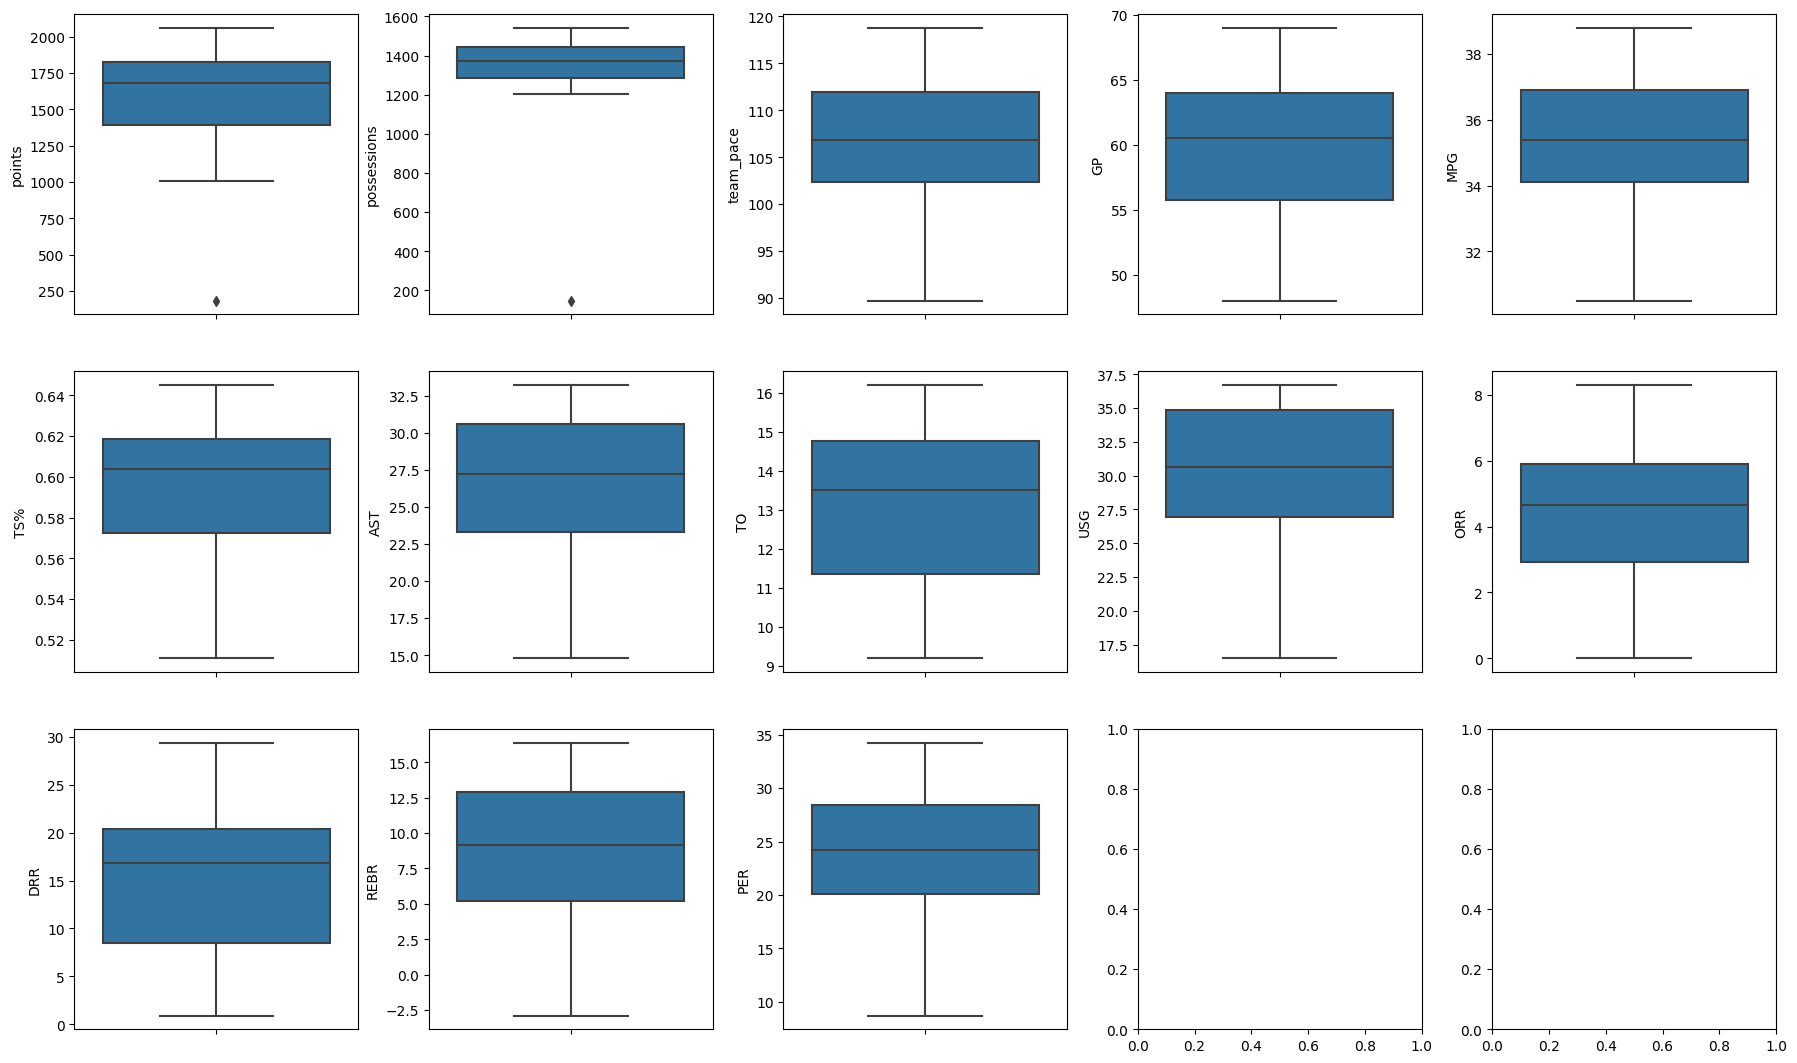

In [25]:
# Create a list of all column names, except for ID.
cols = list(player_df.iloc[:, 1:])

# Create a 3x5 matrix of subplots.
fig, axes = plt.subplots(3, 5, figsize=(18, 11))

# Create padding around subplots to make the axis labels readable.
fig.tight_layout(pad=2.0)

# Loop over the columns of the DataFrame and create a box plot for each one.
for i in range(len(cols)):
    sns.boxplot(ax=axes[i//5, i%5], y=player_df[cols[i]])

In [26]:
# Identify the index number of the row that has the lowest value in 'points'.
points_outlier = player_df['points'].idxmin()
points_outlier

35

In [29]:
# Drop the row that has the outlying values for 'points' and 'possessions'.
player_df.drop(player_df.index[points_outlier], inplace=True)

# Check the end of the DataFrame to ensure that the correct row was dropped.
player_df.tail(10)

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
30,35,1963.0,1539.1,117.4,NaN,NaN,0.633,32.3,16.2,34.0,5.9,19.8,13.1,27.16
31,36,2062.0,1505.7,111.5,NaN,37.0,0.620,29.8,15.6,36.2,4.9,23.9,14.7,27.86
32,37,1845.0,1435.7,113.1,69.0,36.9,0.634,33.2,14.0,36.5,4.1,21.5,16.4,34.26
33,38,1778.0,1526.4,109.3,66.0,34.9,0.612,30.6,15.9,35.9,5.5,18.8,13.7,28.65
34,39,1901.0,1444.1,109.7,67.0,36.5,0.609,27.2,14.8,35.5,5.0,21.8,8.9,20.12
36,42,1631.0,1465.7,110.1,66.0,37.5,0.613,28.4,14.4,35.7,6.5,20.7,14.0,28.40
37,43,1828.0,1507.2,112.7,64.0,36.5,0.618,31.3,14.0,34.9,5.9,21.3,14.5,NaN
38,44,1821.0,1443.7,118.8,66.0,36.6,0.609,27.3,13.5,35.8,7.0,23.8,11.5,22.96
39,45,1740.0,1443.9,114.1,68.0,37.1,0.611,26.6,15.2,29.3,8.3,17.7,11.1,21.22
40,46,1993.0,1459.0,112.5,NaN,36.9,0.627,30.4,15.0,33.7,6.3,19.3,14.1,28.76


In [30]:
# Renumber the DataFrame index to reflect the dropped rows.
player_df.reset_index(drop=True, inplace=True)

In [31]:
# Recheck the totals for NaN values by row.
player_df.isna().sum()

ID             0
points         0
possessions    0
team_pace      0
GP             6
MPG            5
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

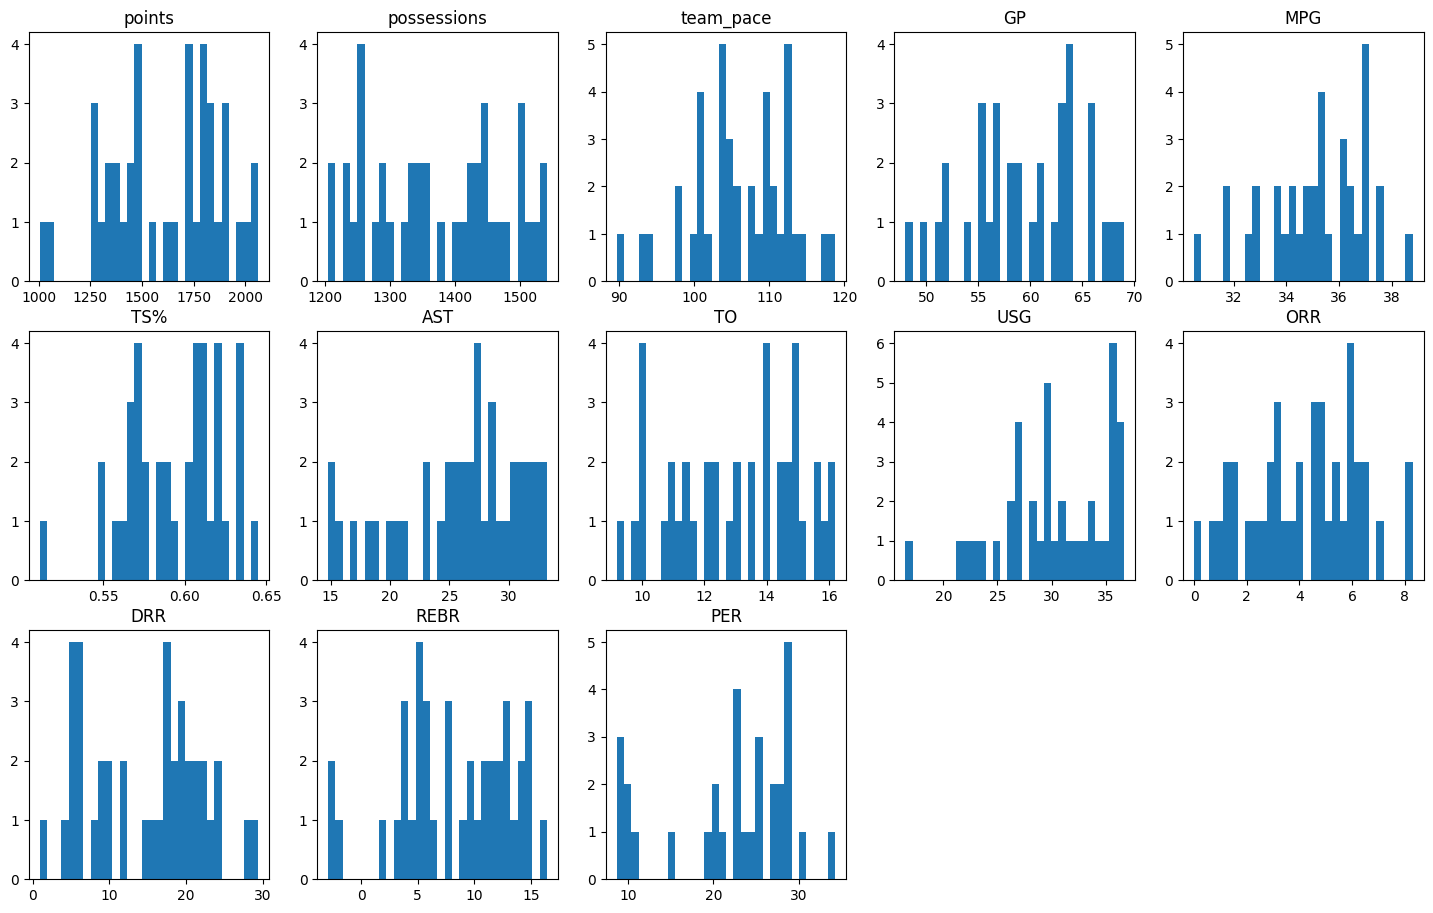

In [32]:
# Create a list of all column names, except for 'ID'.
cols = list(player_df.iloc[:, 1:])

# Define the size for the plots and add padding around them.
fig = plt.figure(figsize=(18, 11))
fig.tight_layout(pad=5.0)

# Loop over the columns in the DataFrame and create a histogram for each one.
for i in range(len(cols)):
    plt.subplot(3, 5, i+1)
    plt.hist(player_df[cols[i]], bins=30)
    plt.title(cols[i])

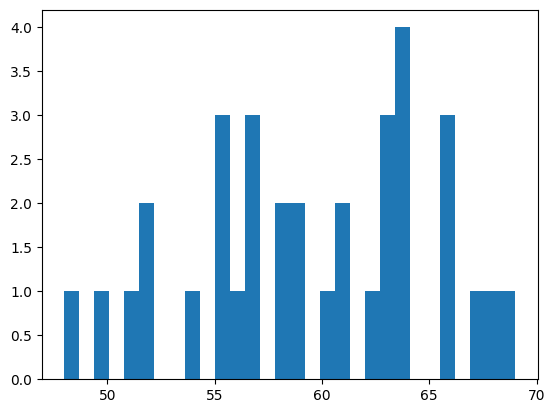

In [33]:
# Create a histogram for the 'GP' column.
plt.hist(player_df['GP'], bins=30);

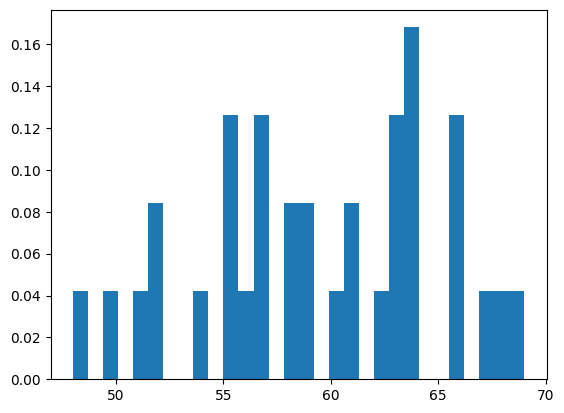

In [34]:
# Create a histogram for the 'GP' column, this time as a probability density.
plt.hist(player_df['GP'], density=True, bins=30);

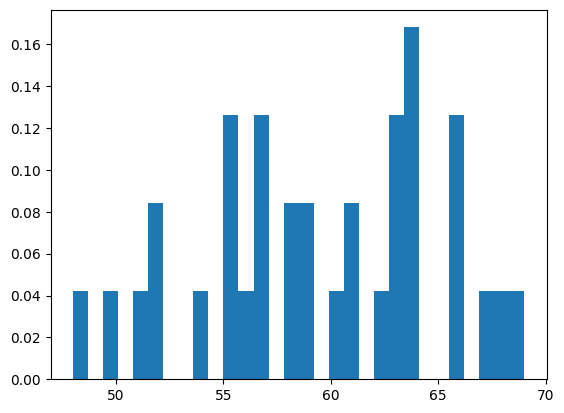

In [35]:
# Create a histogram for the 'GP' column, this time as a probability density.
plt.hist(player_df['GP'], density=True, bins=30);

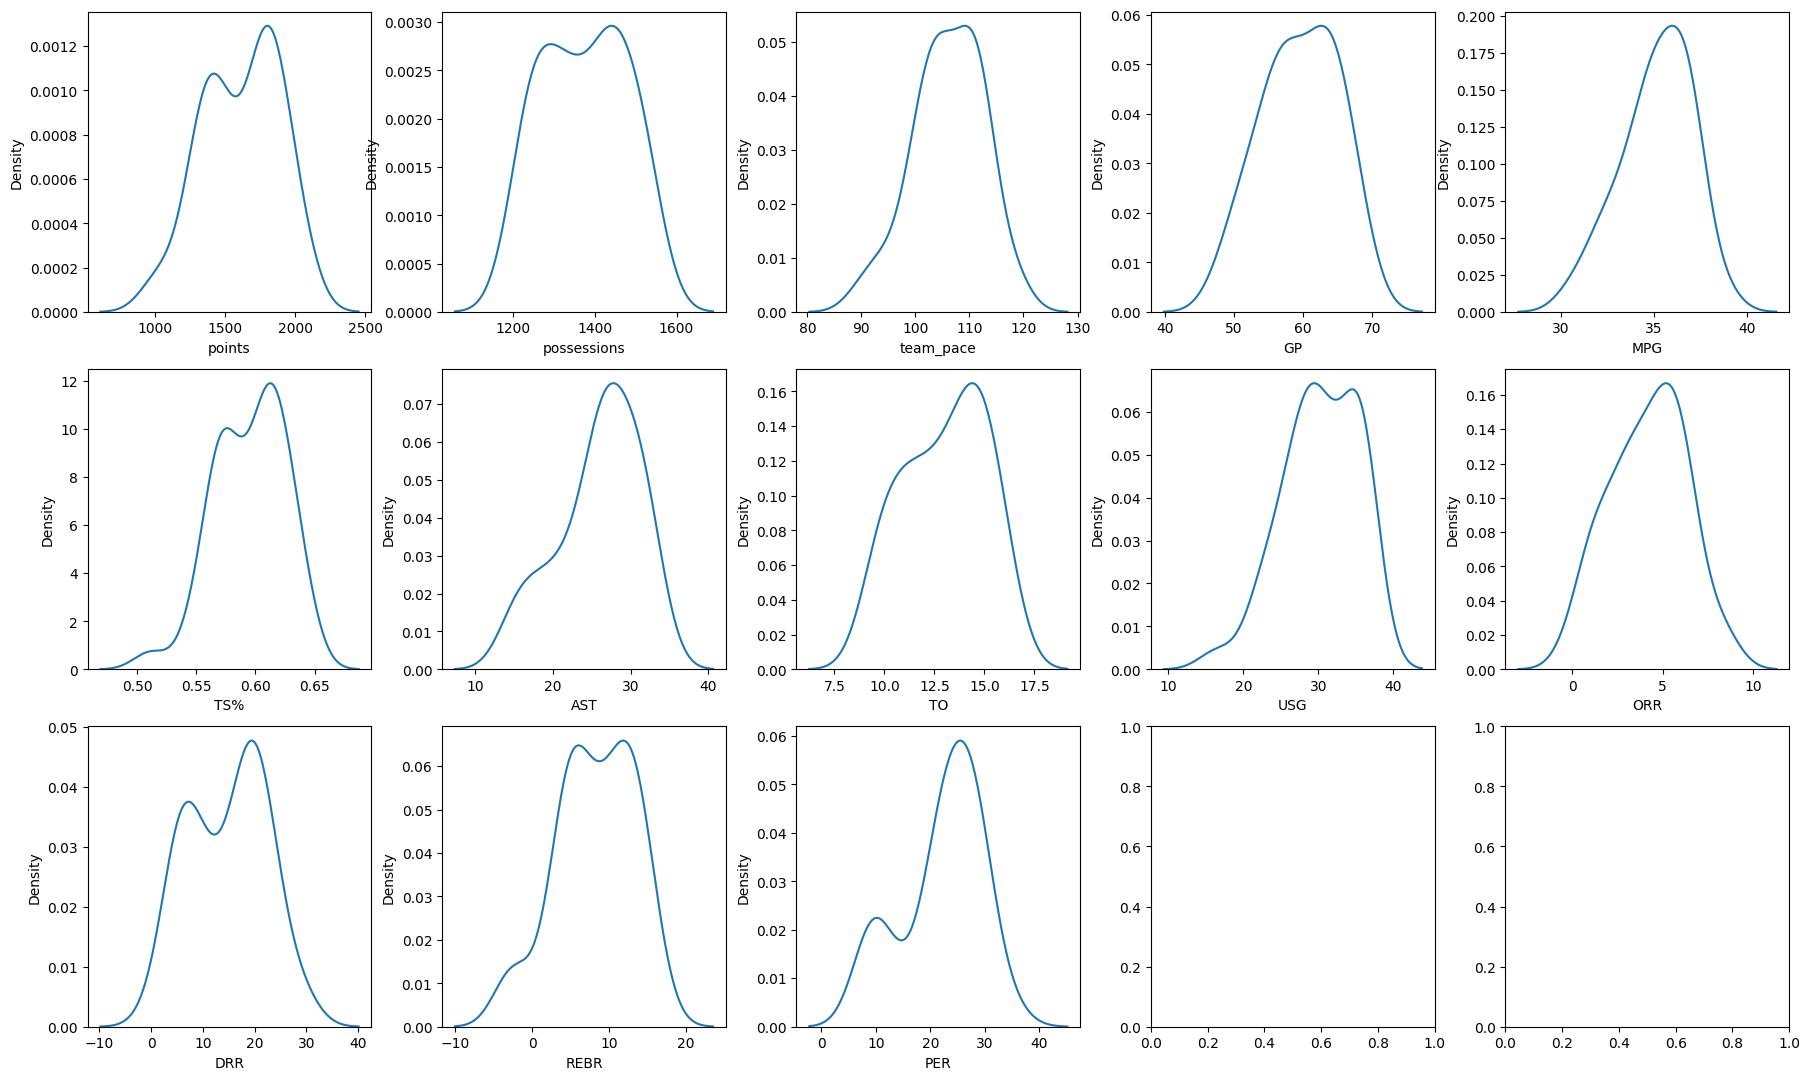

In [36]:
# Create a list of all column names, except for 'ID'.
cols = list(player_df.iloc[:, 1:])

# Create a 3x5 matrix of subplots and add padding around them for readability.
fig, axes = plt.subplots(3, 5, figsize=(18, 11))
fig.tight_layout(pad=2.0)

# Loop over the columns of the DataFrame and create a KDE for each one.
for i in range(len(cols)):
    sns.kdeplot(ax=axes[i//5, i%5], data=player_df[cols[i]])

<Axes: title={'center': 'Points histogram'}, xlabel='points', ylabel='Density'>

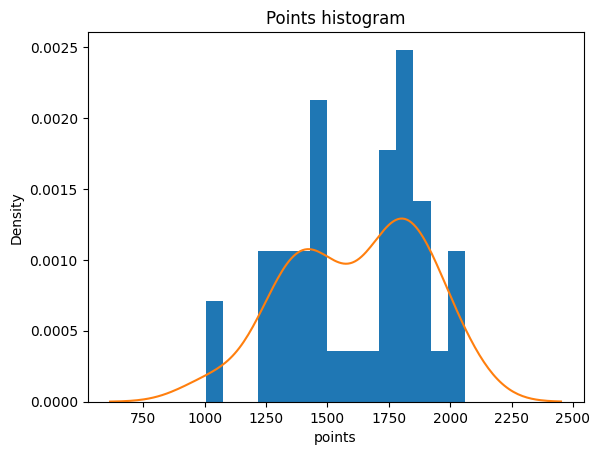

In [37]:
# Plot the KDE for 'points' over the probability-density histogram.
plt.hist(player_df['points'], density=True, bins=15)
plt.title('Points histogram')
sns.kdeplot(player_df['points'])

In [38]:
player_df.loc[player_df['points'] >= 1600].info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 0 to 39
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           22 non-null     int64  
 1   points       22 non-null     float64
 2   possessions  22 non-null     float64
 3   team_pace    22 non-null     float64
 4   GP           19 non-null     float64
 5   MPG          19 non-null     float64
 6   TS%          22 non-null     float64
 7   AST          22 non-null     float64
 8   TO           22 non-null     float64
 9   USG          22 non-null     float64
 10  ORR          22 non-null     float64
 11  DRR          22 non-null     float64
 12  REBR         22 non-null     float64
 13  PER          19 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 2.6 KB


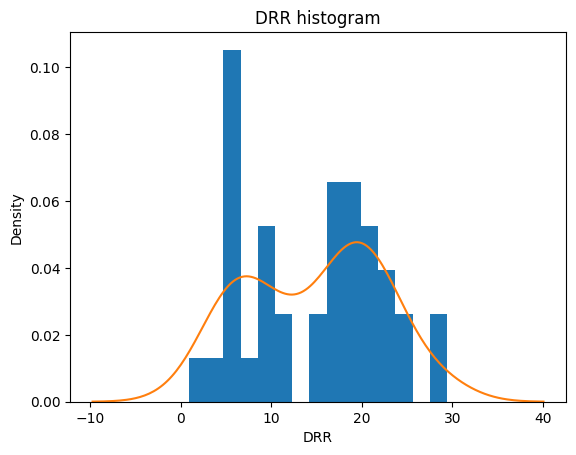

In [39]:
# Plot the KDE for 'DRR' over the probability-density histogram.
plt.hist(player_df['DRR'], density=True, bins=15)
plt.title('DRR histogram')
sns.kdeplot(player_df['DRR']);

In [40]:
player_df.loc[(player_df['points'] >= 1600) & (player_df['DRR'] >= 15)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 0 to 39
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           17 non-null     int64  
 1   points       17 non-null     float64
 2   possessions  17 non-null     float64
 3   team_pace    17 non-null     float64
 4   GP           14 non-null     float64
 5   MPG          15 non-null     float64
 6   TS%          17 non-null     float64
 7   AST          17 non-null     float64
 8   TO           17 non-null     float64
 9   USG          17 non-null     float64
 10  ORR          17 non-null     float64
 11  DRR          17 non-null     float64
 12  REBR         17 non-null     float64
 13  PER          15 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 2.0 KB


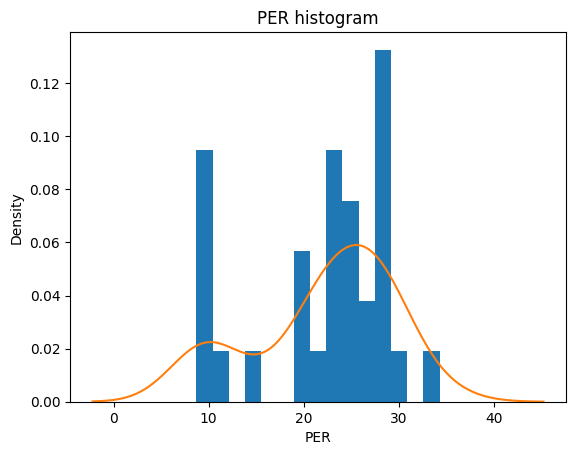

In [41]:
# Plot the KDE for 'PER' over the probability-density histogram.
plt.hist(player_df['PER'], density=True, bins=15)
plt.title('PER histogram')
sns.kdeplot(player_df['PER']);

In [42]:
player_df.loc[(player_df['points'] >= 1600) & (player_df['DRR'] >= 15) & (player_df['PER'] >= 17)]

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
26,31,2049.0,1434.0,110.0,64.0,38.8,0.619,31.5,14.9,35.5,8.3,17.6,12.8,28.44
27,32,1795.0,1481.8,112.1,62.0,35.4,0.608,31.9,14.5,32.0,6.5,22.5,12.9,23.34
28,33,1805.0,1509.9,108.6,64.0,35.4,0.622,27.9,13.9,36.0,5.9,27.7,12.2,22.41
30,35,1963.0,1539.1,117.4,NaN,NaN,0.633,32.3,16.2,34.0,5.9,19.8,13.1,27.16
31,36,2062.0,1505.7,111.5,NaN,37.0,0.620,29.8,15.6,36.2,4.9,23.9,14.7,27.86
32,37,1845.0,1435.7,113.1,69.0,36.9,0.634,33.2,14.0,36.5,4.1,21.5,16.4,34.26
33,38,1778.0,1526.4,109.3,66.0,34.9,0.612,30.6,15.9,35.9,5.5,18.8,13.7,28.65
34,39,1901.0,1444.1,109.7,67.0,36.5,0.609,27.2,14.8,35.5,5.0,21.8,8.9,20.12
35,42,1631.0,1465.7,110.1,66.0,37.5,0.613,28.4,14.4,35.7,6.5,20.7,14.0,28.40
37,44,1821.0,1443.7,118.8,66.0,36.6,0.609,27.3,13.5,35.8,7.0,23.8,11.5,22.96


In [43]:
player_df.loc[player_df['ID'] == 34]

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
29,34,1743.0,1422.4,112.9,64.0,36.3,0.619,30.9,15.6,34.5,5.9,18.9,14.8,NaN


In [44]:
# Initialize the list to house the player data.
pop_list = []

# If the ID number is 30 or less, it's a human player; otherwise, it's a Tune Squad player.
for id in player_df['ID']:
    if id <= 30:
        pop_list.append('player'+str(id))
    else:
        pop_list.append('tune_squad'+str(id%30))

pop_list

['player1',
 'player2',
 'player3',
 'player4',
 'player5',
 'player6',
 'player7',
 'player8',
 'player10',
 'player11',
 'player12',
 'player13',
 'player14',
 'player15',
 'player16',
 'player17',
 'player18',
 'player19',
 'player21',
 'player22',
 'player23',
 'player24',
 'player26',
 'player27',
 'player28',
 'player29',
 'tune_squad1',
 'tune_squad2',
 'tune_squad3',
 'tune_squad4',
 'tune_squad5',
 'tune_squad6',
 'tune_squad7',
 'tune_squad8',
 'tune_squad9',
 'tune_squad12',
 'tune_squad13',
 'tune_squad14',
 'tune_squad15',
 'tune_squad16']

In [45]:
# Assign this list as the values for the new player column in the DataFrame.
player_df['player'] = pop_list
player_df.head()

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,player
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90,player1
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30,player2
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN,player3
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35,player4
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38,player5


In [46]:
# Create list of all DataFrame column names but the last one.
column_list = list(player_df.iloc[:, :-1])

# Make player the second item in the list.
column_list.insert(1, 'player')

# Reassign the columns in the player_df DataFrame in this new order.
player_df = player_df[column_list]

# Verify that the columns are ordered the way you expect.
player_df.head()

,ID,player,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,player1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,player2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,player3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,player4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,player5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38


In [47]:
# Recheck the totals for NaN values by row.
player_df.isna().sum()

ID             0
player         0
points         0
possessions    0
team_pace      0
GP             6
MPG            5
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

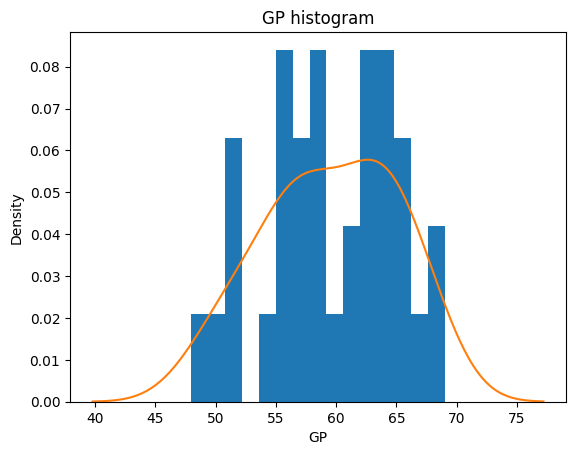

In [48]:
# Plot the KDE for 'GP' over the probability-density histogram.
plt.hist(player_df['GP'], density=True, bins=15)
plt.title('GP histogram')
sns.kdeplot(player_df['GP']);

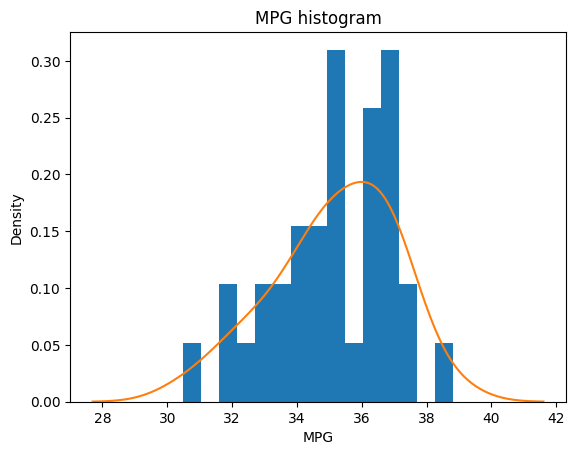

In [49]:
# Plot the KDE for 'MPG' over the probability-density histogram.
plt.hist(player_df['MPG'], density=True, bins=15)
plt.title('MPG histogram')
sns.kdeplot(player_df['MPG']);

In [50]:
# Replace the missing values in 'GP' and 'MPG' with the mean values of the respective columns.
player_df[['GP','MPG']] = player_df[['GP','MPG']].fillna(value=player_df[['GP','MPG']].mean())

# Recheck the totals for NaN values by row to ensure that the expected missing values are filled in.
player_df.isna().sum()

ID             0
player         0
points         0
possessions    0
team_pace      0
GP             0
MPG            0
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

Mean r2 score: 0.9829
10% of r2 scores are between 0.8650 and 0.8785
10% of r2 scores are between 0.9594 and 0.9729
80% of r2 scores are between 0.9864 and 0.9999


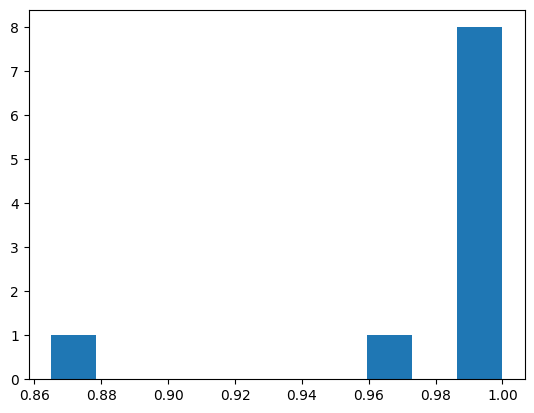

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Define the variables for the regression model as those rows that have no missing values.
X = player_df.dropna(how='any').iloc[:, 5:-1].to_numpy()
y = player_df.dropna(how='any').iloc[:, -1]

# Define the regression model.
lin_reg = LinearRegression()

# Use the scikit-learn cross-validation function to fit this model 10 times and return the R2 scores.
scores = cross_val_score(lin_reg, X, y, cv=10, scoring='r2')

# Define the histogram of the scores and copy out information from the histogram.
entries, bin_edges, patches = plt.hist(scores, bins=10);

# Print out the mean and the results from the histogram.
print('Mean r2 score: {:.4f}'.format(scores.mean()))
for i in range(len(entries)):
    if entries[i] > 0:
        print('{:.0f}% of r2 scores are between {:.4f} and {:.4f}'.format(entries[i]*100/len(entries), 
        bin_edges[i], 
        bin_edges[i+1]))

In [57]:
# Fit the same regression model, this time using all of the available data.
lin_reg.fit(X, y)

LinearRegression()

In [58]:
# Create and display a mask of rows in the DataFrame. Rows should contain at least one NaN value.
mask = player_df.isnull().any(axis=1)
mask

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7      True
8      True
9     False
10    False
11     True
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29     True
30    False
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
dtype: bool

In [59]:
# Apply the mask defined earlier to show the contents of specific columns of rows that contain NaN values.
player_df.loc[mask].iloc[:, 5:-1]

,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR
2,55.000000,36.300000,0.605,25.7,13.9,28.1,4.5,4.9,1.8
7,57.000000,35.157143,0.574,24.4,11.3,26.3,5.5,5.8,-2.2
8,61.000000,35.600000,0.547,22.9,12.2,22.7,5.8,6.4,-2.9
11,59.529412,31.700000,0.584,32.4,14.7,16.5,3.2,19.0,4.1
15,59.529412,34.900000,0.603,26.2,11.1,36.7,3.0,14.3,5.3
20,61.000000,35.157143,0.645,20.6,13.1,31.5,4.0,12.0,5.2
24,48.000000,35.100000,0.569,19.0,10.9,29.2,4.6,17.7,5.2
29,64.000000,36.300000,0.619,30.9,15.6,34.5,5.9,18.9,14.8
36,64.000000,36.500000,0.618,31.3,14.0,34.9,5.9,21.3,14.5


In [60]:
# Impute the missing values in 'PER' by using the regression model and mask.
player_df.loc[mask, 'PER'] = lin_reg.predict(player_df.loc[mask].iloc[:, 5:-1])

# Recheck the DataFrame for rows that have missing values.
player_df.isna().sum()

C:\Users\gonza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ID             0
player         0
points         0
possessions    0
team_pace      0
GP             0
MPG            0
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            0
dtype: int64

In [61]:
# Display the entire DataFrame.
player_df

,ID,player,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,player1,1893.0,1251.8,97.8,63.000000,33.900000,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.900000
1,2,player2,1386.0,1282.5,110.5,58.000000,32.500000,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.300000
2,3,player3,1405.0,1252.3,105.8,55.000000,36.300000,0.605,25.7,13.9,28.1,4.5,4.9,1.8,16.594640
3,4,player4,1282.0,1235.9,100.7,54.000000,37.600000,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.350000
4,5,player5,1721.0,1254.0,105.7,59.000000,30.500000,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.380000
5,6,player6,1004.0,1322.4,102.1,57.000000,36.300000,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.830000
6,7,player7,1920.0,1207.6,109.8,55.000000,37.000000,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.710000
7,8,player8,1353.0,1348.1,112.2,57.000000,35.157143,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,8.710806
8,10,player10,1468.0,1400.9,93.7,61.000000,35.600000,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,3.108388
9,11,player11,1856.0,1303.8,93.4,55.000000,33.600000,0.563,28.9,14.7,26.7,1.4,17.3,4.3,9.670000


In [62]:
player_df.to_csv('player_data_final.csv', index=False)